# Handwriten digit classification using neural network

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline


In [40]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
len(X_train)

60000

In [42]:
X_train[0].shape

(28, 28)

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

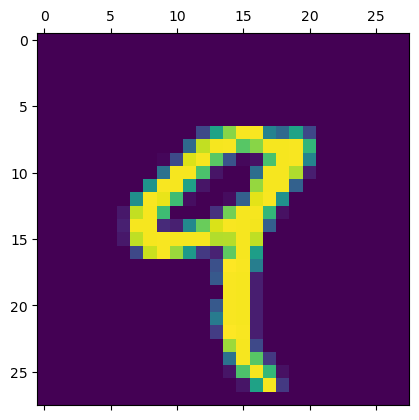

In [44]:
plt.matshow(X_train[4])
plt.show()

In [45]:
y_train[4]

9

In [46]:
X_train = X_train / 255
X_test = X_test / 255

In [47]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [48]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train, epochs=5)

c:\Users\saura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8137 - loss: 0.7191
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9122 - loss: 0.3132
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9232 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9266 - loss: 0.2654


In [50]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9147 - loss: 0.3019


[0.2670503258705139, 0.9254999756813049]

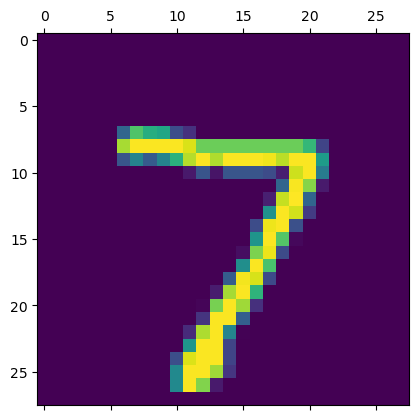

In [54]:
plt.matshow(X_test[0])
plt.show()

In [55]:
y_predicted = model.predict(X_test_flat)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.7004726e-02, 3.8889266e-07, 4.3178912e-02, 9.4768143e-01,
       2.1074745e-03, 1.0358008e-01, 1.2844094e-06, 9.9976563e-01,
       9.2805937e-02, 5.8892912e-01], dtype=float32)

In [56]:
np.argmax(y_predicted[0])

7

In [57]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    2,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,   11,  908,   20,    8,    3,   13,   12,   46,    3],
       [   4,    0,   13,  926,    1,   21,    2,   10,   26,    7],
       [   2,    1,    4,    1,  923,    0,    8,    4,   10,   29],
       [  11,    3,    3,   34,   11,  766,   12,    7,   38,    7],
       [  15,    3,    4,    2,    7,    9,  911,    2,    5,    0],
       [   1,    6,   20,    7,    6,    1,    0,  956,    4,   27],
       [   7,    7,    6,   19,    9,   18,    8,   12,  881,    7],
       [  11,    7,    1,    9,   32,    6,    0,   28,    8,  907]])>

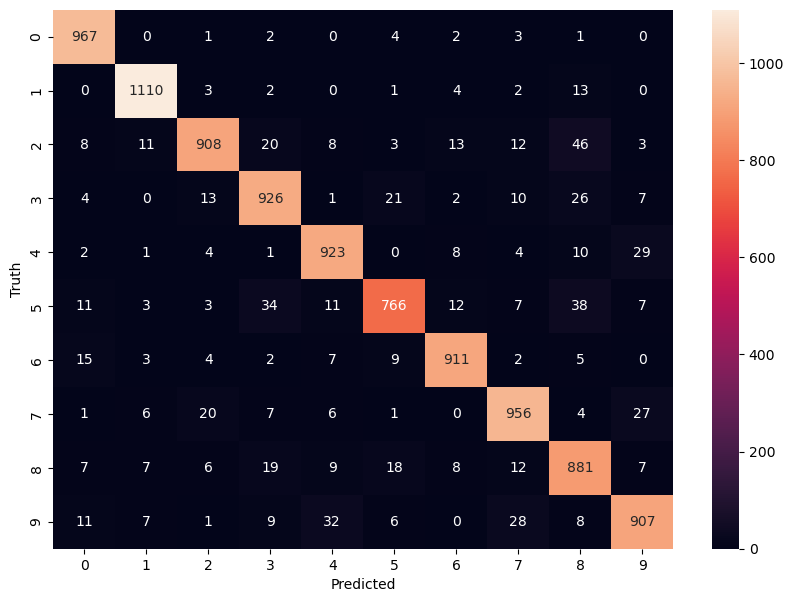

In [62]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [66]:
model = keras.Sequential([
    
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train, epochs=5)

c:\Users\saura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8313 - loss: 0.6881
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9389 - loss: 0.2174
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9558 - loss: 0.1545
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9647 - loss: 0.1224
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9729 - loss: 0.0971


In [67]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1115


[0.09972229599952698, 0.9700000286102295]